In [1]:
import pandas as pd

# titles.csv

In [2]:
titles = pd.read_csv('C:/Users/dell/Documents/ML Training/OneDrive-2024-06-20/titles.csv')
titles.head()

,title,year
0,El plebeyo,1953
1,Atoski vrtovi - preobrazenje,1989
2,Mateegy norkos,2006
3,Lanka Dahanam,1936
4,Acciaio,1933


## What are the ten most common movie names of all time?

In [3]:
titles.groupby('title').size().sort_values().tail(10)

title
Anna                    10
Maya                    11
Freedom                 11
Temptation              11
The Three Musketeers    11
Othello                 11
The Outsider            12
Macbeth                 16
Carmen                  17
Hamlet                  20
dtype: int64

In [4]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    11
Othello                 11
The Three Musketeers    11
Temptation              11
Freedom                 11
Anna Karenina           10
Name: title, dtype: int64

## Which three years of the 1930s saw the most films released?

In [5]:
t1 = titles[(titles['year'] >= 1930) & (titles['year'] <= 1939)]
t1.head(10)

,title,year
3,Lanka Dahanam,1936
4,Acciaio,1933
8,Oklahoma Jim,1931
68,Blackmailer,1936
90,Papacito lindo,1939
98,Zigeunerbaron,1935
111,Les filles de la concierge,1934
151,Madame Butterfly,1932
164,Ball im Savoy,1935
173,Der Kosak und die Nachtigall,1935


In [6]:
t1.groupby('year').count().sort_values('title' , ascending = False).head(3)

,title
year,
1937,1217
1938,1161
1936,1153


In [7]:
#another way

In [8]:
t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1217
1938    1161
1936    1153
Name: year, dtype: int64

## Plot the number of films that have been released each decade over the history of cinema.

In [9]:
t1 = titles
t1['decade'] = (t1.year // 10) * 10
t1

,title,year,decade
0,El plebeyo,1953,1950
1,Atoski vrtovi - preobrazenje,1989,1980
2,Mateegy norkos,2006,2000
3,Lanka Dahanam,1936,1930
4,Acciaio,1933,1930
...,...,...,...
226008,Eyes of Youth,1919,1910
226009,Madrid,2002,2000
226010,Ridgeway of Montana,1924,1920
226011,Professor Mamlock,1961,1960


In [10]:
# value_counts() will count frequecy of unique value(also include nan) and return a series of values and their frequency from most to least
t1.decade.value_counts()

2010    65830
2000    35730
1990    21547
1980    19532
1970    18476
1960    17419
1950    12664
1930    10245
1920     8954
1940     8561
1910     6752
2020      260
1900       39
1890        3
2110        1
Name: decade, dtype: int64

<AxesSubplot:ylabel='Frequency'>

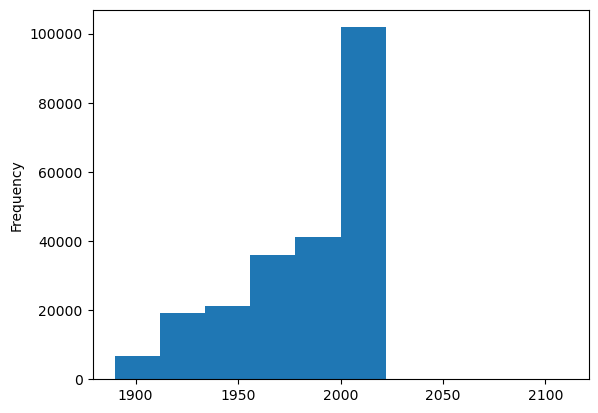

In [11]:
t1.decade.plot(kind = 'hist')

<AxesSubplot:>

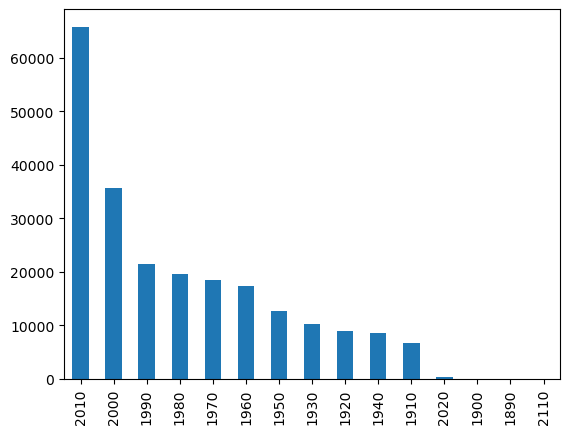

In [12]:
t1.decade.value_counts().plot(kind = 'bar')

In [13]:
# we can see decades are not in order in above plot , for we will -
t1 = t1.decade.value_counts()
t1.sort_index()

1890        3
1900       39
1910     6752
1920     8954
1930    10245
1940     8561
1950    12664
1960    17419
1970    18476
1980    19532
1990    21547
2000    35730
2010    65830
2020      260
2110        1
Name: decade, dtype: int64

<AxesSubplot:>

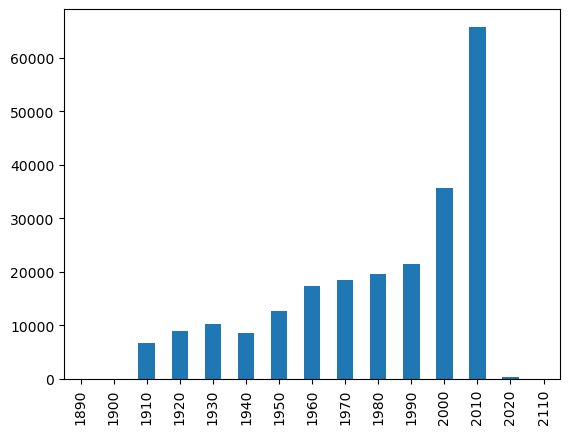

In [14]:
t1.sort_index().plot(kind = 'bar')

<AxesSubplot:>

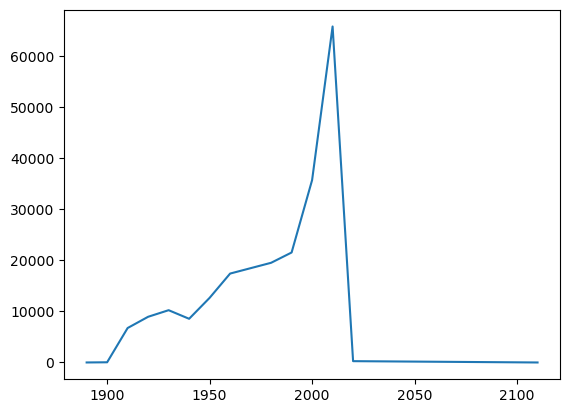

In [15]:
t1.sort_index().plot(kind = 'line')

<AxesSubplot:title={'center':'Number of films by decade'}, xlabel='decade', ylabel='# of films'>

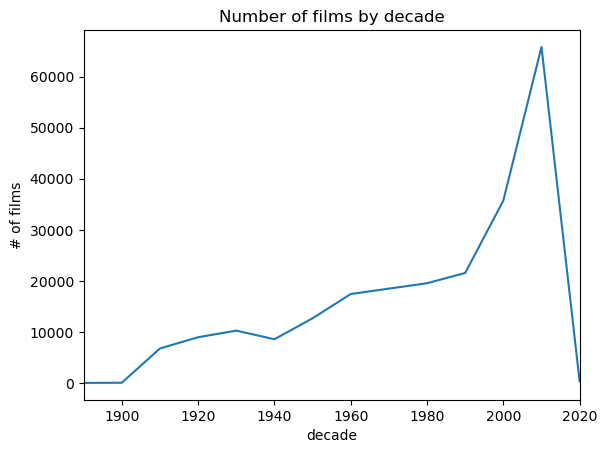

In [16]:
# to make plot look more presentable
t1.sort_index().plot(kind="line",title="Number of films by decade", xlim=(1890,2020), ylabel = "# of films" , xlabel = "decade")

## Plot the number of "Hamlet" films made each decade

In [17]:
th = titles[titles.title == "Hamlet"]
th.decade.value_counts()

2010    5
1910    3
1990    2
1970    2
2000    2
1960    2
1980    1
1920    1
1940    1
1950    1
Name: decade, dtype: int64

In [18]:
th.decade.value_counts().sort_index()

1910    3
1920    1
1940    1
1950    1
1960    2
1970    2
1980    1
1990    2
2000    2
2010    5
Name: decade, dtype: int64

<AxesSubplot:title={'center':'Hamlet movies made each decade'}, xlabel='Decade', ylabel='Frequency of Hamlet'>

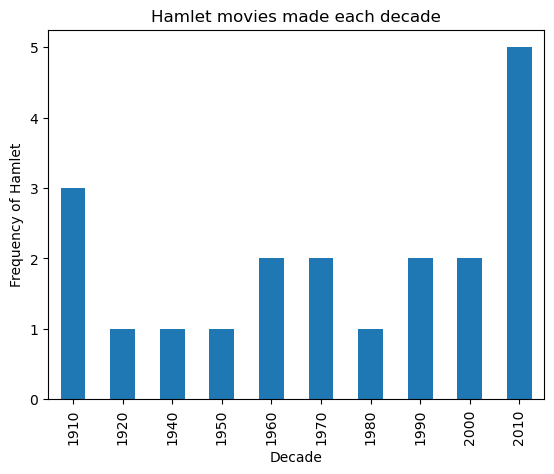

In [19]:
th = th.decade.value_counts().sort_index()
th.plot(kind = 'bar' , title = "Hamlet movies made each decade" , ylabel = "Frequency of Hamlet" , xlabel = "Decade")

# cast.csv

In [20]:
c = pd.read_csv('C:/Users/dell/Documents/ML Training/OneDrive-2024-06-20/cast.csv')
c['decade'] = (c.year // 10) * 10
c

,title,year,name,type,character,n,decade
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010
...,...,...,...,...,...,...,...
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0,1980
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0,2000
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0,1980
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0,2000


## Plot the number of "Rustler" characters in each decade of the history of film.

<AxesSubplot:title={'center':'Rustler characters each decade'}, xlabel='Decade', ylabel='Frequency of Rustler characters'>

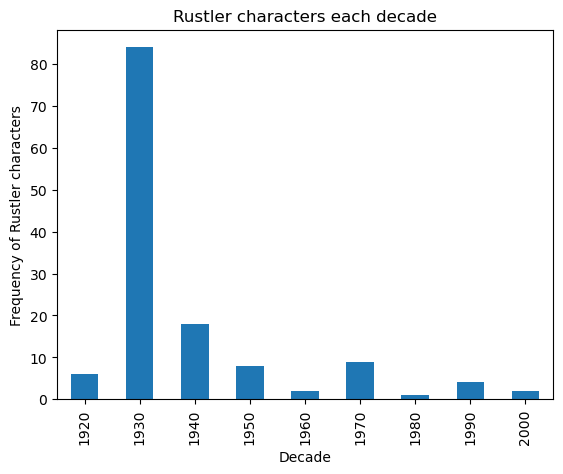

In [21]:
cr = c[c.character == "Rustler"]
cr = cr.decade.value_counts().sort_index()
cr.plot(kind = 'bar' , title = "Rustler characters each decade" , ylabel = "Frequency of Rustler characters" , xlabel = "Decade")

<AxesSubplot:title={'center':'Rustler characters each decade'}, xlabel='decade', ylabel='Frequency of Rustler characterss'>

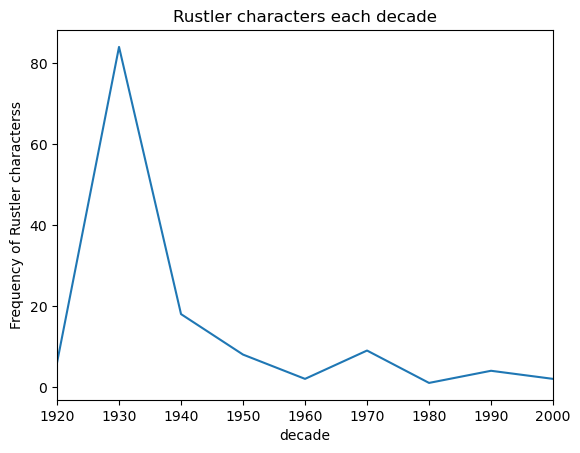

In [22]:
cr.sort_index().plot(kind="line",title="Rustler characters each decade", xlim=(1920,2000), ylabel = "Frequency of Rustler characterss" , xlabel = "decade")

## Plot the number of "Hamlet" characters each decade.

In [23]:
c2 = c[c.title == "Hamlet"]
c2

,title,year,name,type,character,n,decade
1547,Hamlet,1996,Riz Abbasi,actor,Attendant to Claudius,1.0,1990
7145,Hamlet,1921,Fritz Achterberg,actor,"Fortinbras,",9.0,1920
10751,Hamlet,2009,Hayden Adams,actor,Laertes,7.0,2000
10752,Hamlet,2009,Hayden Adams,actor,Player,7.0,2000
13251,Hamlet,1913,Eric Adeney,actor,Reynaldo,14.0,1910
...,...,...,...,...,...,...,...
3341231,Hamlet,1969,Jennifer Tudor,actress,Court lady,23.0,1960
3363189,Hamlet,2000,Diane Venora,actress,Gertrude,3.0,2000
3391416,Hamlet,1996,Perdita Weeks,actress,Second Player,44.0,1990
3395743,Hamlet,2015,Katie (II) West,actress,Ophelia,7.0,2010


In [24]:
c2 = c2.decade.value_counts().sort_index()
print(c2)

1910    28
1920     9
1940    24
1950     5
1960    57
1970    19
1980     3
1990    83
2000    55
2010    59
Name: decade, dtype: int64


<AxesSubplot:title={'center':'Number of Hamlet characters each decade'}, xlabel='Decade', ylabel='Total Hamlet characters'>

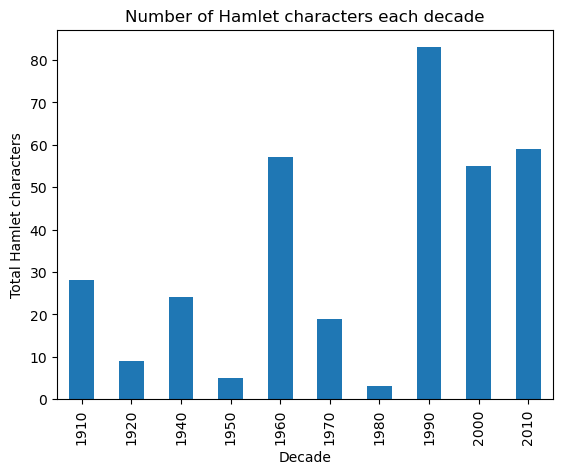

In [25]:
c2.plot(kind = 'bar' , title = "Number of Hamlet characters each decade" , ylabel = "Total Hamlet characters" , xlabel = "Decade")

<AxesSubplot:title={'center':'Number of Hamlet characters each decade'}, xlabel='decade', ylabel='Total Hamlet characters'>

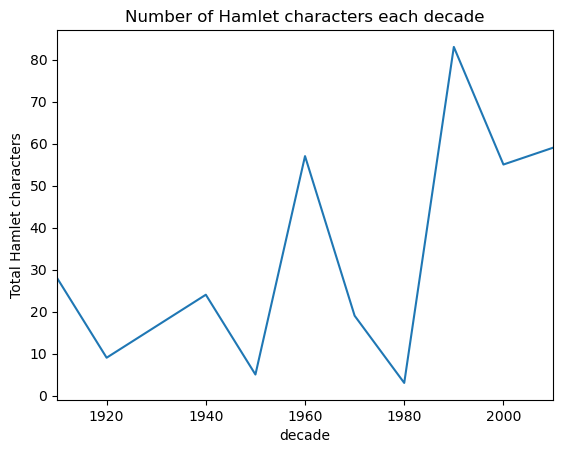

In [26]:
c2.sort_index().plot(kind="line",title="Number of Hamlet characters each decade", xlim=(1910,2010), ylabel = "Total Hamlet characters" , xlabel = "decade")

## What are the 11 most common character names in movie history?

In [27]:
c3 = c
c3.character.value_counts().head(11)

Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Minor Role      6203
Name: character, dtype: int64

## Who are the 10 people most often credited as "Herself" in film history?

In [28]:
c4 = c
c4 = c4[c4.character == "Herself"]
c4

,title,year,name,type,character,n,decade
109472,Alexander Jamieson,2017,Etta Baker,actor,Herself,NaN,2010
183711,Le fils de Gascogne,1995,René Biaggi,actor,Herself,22.0,1990
195556,Forty Shades of Blue,2005,J. Blackfoot,actor,Herself,7.0,2000
195869,Wienfilm 1896-1976,1976,Moucle Blackout,actor,Herself,NaN,1970
212576,Not Another B Movie,2010,Babette Bombshell,actor,Herself,19.0,2010
...,...,...,...,...,...,...,...
3440957,Beziehungsweisen,2012,Heidemarie Zunken-Kreplien,actress,Herself,7.0,2010
3441187,All Superheroes Must Die 2: The Last Superhero,2016,Tiana Zuzierla,actress,Herself,NaN,2010
3441647,Vivir en Sevilla,1978,Beatriz (VI) Álvarez,actress,Herself,NaN,1970
3441763,Torres Quevedo: Vol. 2,2016,Patricia (XI) Álvarez,actress,Herself,204.0,2010


In [29]:
c4.name.value_counts().head(10)

Queen Elizabeth II        11
María Luisa (V) Martín     9
Luisa Horga                9
Joyce Brothers             8
Margaret Thatcher          8
Hillary Clinton            8
Sumie Sakai                6
Marta Berrocal             6
Inés J. Southern           6
Rekha                      6
Name: name, dtype: int64

## Who are the 10 people most often credited as "Himself" in film history?

In [30]:
ch = c[c.character == "Himself"]
ch

,title,year,name,type,character,n,decade
35,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN,1970
36,I Wanna Hold Your Hand,1978,Murray the 'K',actor,Himself,48.0,1970
55,Whitefolks,2017,Darryel 'Original Whitefolks' Woodson,actor,Himself,14.0,2010
92,Love Hollywood Style,2006,Mac 10,actor,Himself,NaN,2000
119,The Beat,2003,4-Zone,actor,Himself,NaN,2000
...,...,...,...,...,...,...,...
3293013,Der letzte Bissen,2007,Vanessa Struhler,actress,Himself,NaN,2000
3297298,Paper Heart,2009,Gill Summers,actress,Himself,4.0,2000
3335528,The Feminine Touch,1941,Dennie Travis,actress,Himself,NaN,1940
3375962,Change (IV),2014,Bára Vávrová,actress,Himself,NaN,2010


In [31]:
ch.name.value_counts().head(10)

Adolf Hitler          91
Richard Nixon         43
Ronald Reagan         37
John F. Kennedy       35
Winston Churchill     24
George W. Bush        24
Martin Luther King    23
Bill Clinton          22
Benito Mussolini      21
Ron Jeremy            20
Name: name, dtype: int64

## Which actors or actresses appeared in the most movies in the year 1985?

In [32]:
# doubt
ca = c[(c.year == 1985)]
ca.name.value_counts()

Mammootty             22
Sukumari              20
Shakti Kapoor         19
Raj Babbar            15
Mohanlal              15
                      ..
Charles Linton         1
Peter Links            1
Wolf-Dieter Lingk      1
Howard Lineberger      1
Dalla Þórðardóttir     1
Name: name, Length: 20612, dtype: int64

## Plot how many roles Mammootty has played in each year of his career.

In [33]:
cm = c[c.name == "Mammootty"]
cm = cm.year.value_counts().sort_index()
print(cm)

1971     1
1980     2
1981     3
1982     7
1983    18
1984    16
1985    22
1986    18
1987    10
1988     7
1989    10
1990    16
1991     6
1992     3
1993     5
1994     5
1995     5
1996     5
1997     2
1998     4
1999     4
2000     7
2001     3
2002     3
2003     2
2004     7
2005     6
2006     8
2007     7
2008     9
2009    11
2010     7
2011     7
2012     7
2013     5
2014     6
2015     6
2016     4
2017     2
Name: year, dtype: int64


<AxesSubplot:title={'center':'Number of Mammootty roles in each year of his entire career'}, xlabel='Year', ylabel='Number of roles'>

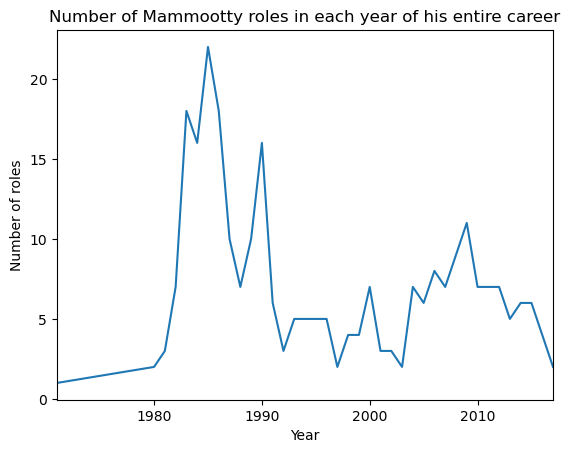

In [34]:
cm.plot(kind="line",title="Number of Mammootty roles in each year of his entire career", xlim=(1971,2017), ylabel = "Number of roles",xlabel="Year")

## What are the 10 most frequent roles that start with the phrase "Patron in"?

In [35]:
cp = c
cp = cp[cp.character.str.contains("Patron in") == True]
cp

,title,year,name,type,character,n,decade
19696,Let It Ride,1989,Ralph Ahn,actor,Patron in Chinese Restaurant,43.0,1980
22711,Alex Cross,2012,Anthony Akins,actor,Patron in restaurant,NaN,2010
24240,Missing Pieces,2012,Rico Alago,actor,Patron in Restaurant,NaN,2010
28847,The Black Bird,1975,John Alderman,actor,Patron in Ballroom,NaN,1970
30914,Sparkle,2012,Eligah Alexander Jr.,actor,Patron in Audience,NaN,2010
...,...,...,...,...,...,...,...
3116878,Above Suspicion,1943,Nita Pike,actress,Patron in Frisky Rabbit,NaN,1940
3123680,Crashing,2007,Sachi Pollard,actress,Patron in the Coffee House,56.0,2000
3326927,Crashing,2007,Talia Tinari,actress,Patron in the Coffee House,57.0,2000
3328565,Breaking the Press,2010,Michelle Toche,actress,Patron in restaurant,NaN,2010


In [36]:
cp[cp.character.str.contains("Patron in ") == True].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       8
Patron in Billiard Parlor        5
Patron in Restaurant             3
Patron in restaurant             3
Patron in Bar                    3
Patron in Club                   3
Patron in cabaret                3
Theatre Patron in Loge           2
Name: character, dtype: int64

In [37]:
# another way
cp[cp.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       8
Patron in Billiard Parlor        5
Patron in restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in Bar                    3
Patron in Audience               2
Name: character, dtype: int64

## What are the 10 most frequent roles that start with the word "Science"?

In [38]:
cs = c
cs = cs[cs.character.str.contains("Science") == True]
cs

,title,year,name,type,character,n,decade
11160,Teen Wolf Too,1987,Matthew T. Adams,actor,Science Student,NaN,1980
30870,Three O'Clock High,1987,Michael Alex,actor,Science Kid,25.0,1980
76325,Star Trek,2009,Richard (III) Arnold,actor,Romulan Science Tech,NaN,2000
83011,Mutant Chronicles,2008,Roger Ashton-Griffiths,actor,Science Monk,13.0,2000
128651,The Giggles,2013,Kevin Barnstein,actor,Science Performer 3,19.0,2010
...,...,...,...,...,...,...,...
3387011,The End,2007,Randi Warwick,actress,Science Assistant,NaN,2000
3395188,EMO the Musical,2016,Marie Werrett,actress,Science Teacher,NaN,2010
3401642,Ransom,1996,Anna Marie Wieder,actress,Woman at Science Fair,65.0,1990
3404161,Real Genius,1985,JoAnn Willette,actress,Girl at Science Fair,16.0,1980


In [39]:
cs[cs.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: character, dtype: int64

## Plot the n-values of the roles that Judi Dench has played over her career.

<AxesSubplot:xlabel='year', ylabel='n'>

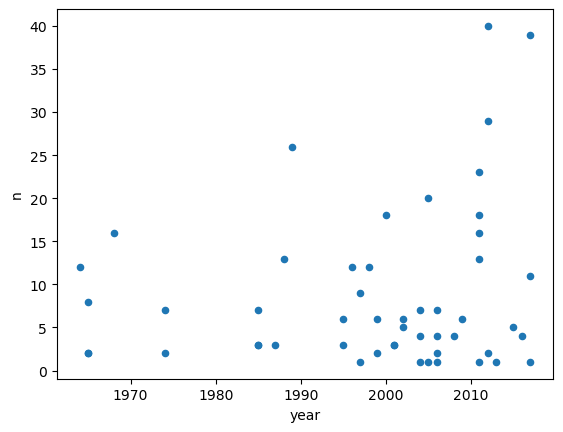

In [43]:
cj = c
cj = cj[cj.name == 'Judi Dench']
cj = cj[cj.n.notnull()]
cj.plot(x='year', y='n', kind='scatter')

## Plot the n-values of Cary Grant's roles through his career.

<AxesSubplot:xlabel='year', ylabel='n'>

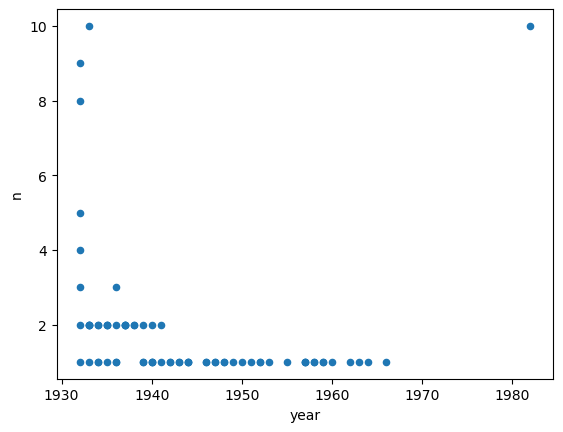

In [44]:
ccg = c
ccg = ccg[ccg.name == 'Cary Grant']
ccg = ccg[ccg.n.notnull()]
ccg.plot(x='year', y='n', kind='scatter')

## Plot the n-value of the roles that Sidney Poitier has acted over the years.

<AxesSubplot:xlabel='year', ylabel='n'>

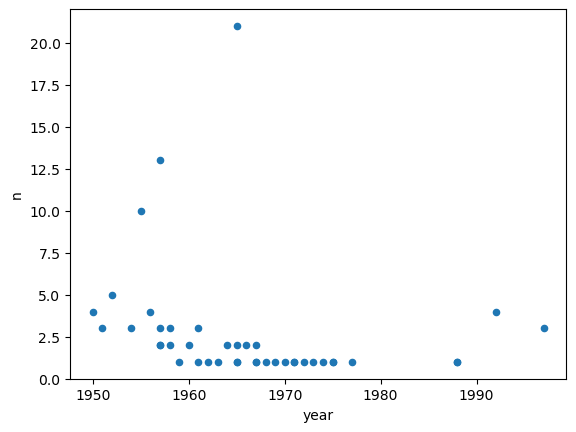

In [47]:
csp= c
csp = csp[csp.name == 'Sidney Poitier']
csp= csp[csp.n.notnull()]
csp.plot(x='year', y='n', kind='scatter')

## How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [48]:
n1 = c
n1 = n1[n1.n == 1]
n1 = n1[n1.decade == 1950]
n1.type.value_counts()

actor      6482
actress    2985
Name: type, dtype: int64

## How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [49]:
n2 = c
n2 = n2[n2.n == 2]
n2 = n2[n2.decade == 1950]
n2.type.value_counts()

actor      4520
actress    4496
Name: type, dtype: int64